In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import string
import gensim
import operator
import re

In [2]:
%pip install ipython-autotime

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autotime

time: 0 ns (started: 2022-08-09 23:44:39 +08:00)


In [4]:
data = pd.read_csv('combined_relevant_dataset.csv')
# data = pd.read_csv('test_dataset_labeled.csv')

data.head()

,MAL_ID,Name,Score,Genres,sypnopsis,Type,Aired,Studios,music movie,bakugan battle brawlers,tenchi shounen,azuki daizu show,comedy,boy superpowers,harem cats,ninja fighting,fairy tail,2004 shounen show
0,16480,Ojarumaru Yakusoku no Natsu Ojaru to Semira Movie,Unknown,"Adventure, Comedy, Fantasy","short film introduces Semira, a strange boy wh...",OVA,"Jan 28, 2002",Unknown,0.0,0.0,0.0,0,1,0.5,0.0,0.0,0,0.0
1,29425,Teach,Unknown,"Adventure, Music, Kids",Teach is a curious monkey who travels the worl...,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
2,36598,Heart Beat,5.25,Music,Official music video for the song Heart Beat b...,NaN,NaN,NaN,0.5,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
3,33114,Experiment,Unknown,Dementia,short film by Tsuji Naoyuki that blends stop m...,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0
4,43603,Ookina Furudokei (2002),Unknown,"Kids, Music",The third release of the Japanese version of t...,NaN,NaN,NaN,0.5,NaN,0.0,0,0,0.0,0.0,0.0,0,0.0


time: 16 ms (started: 2022-08-09 23:44:39 +08:00)


In [5]:
from spacy.lang.en.stop_words import STOP_WORDS

spacy_nlp = spacy.load('en_core_web_sm')

punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS


def spacy_tokenizer(sentence):
    sentence = re.sub('\'','',sentence)
    sentence = re.sub('\w*\d\w*','',sentence)
    sentence = re.sub(' +',' ',sentence)
    sentence = re.sub(r'\n: \'\'.*','',sentence)
    sentence = re.sub(r'\n!.*','',sentence)
    sentence = re.sub(r'^:\'\'.*','',sentence)
    sentence = re.sub(r'\n',' ',sentence)
    sentence = re.sub(r'[^\w\s]',' ',sentence)
    tokens = spacy_nlp(sentence)
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in tokens]
    tokens = [word for word in tokens if word not in stop_words and word not in punctuations and len(word) > 2]
    
    return tokens

time: 609 ms (started: 2022-08-09 23:44:39 +08:00)


In [6]:
data['Input Data'] = data['Name'].apply(str) + " " + data['Genres'].apply(str) + " " + data['Type'].apply(str) + " " + data['Aired'].apply(str) + " " + data['Studios'].apply(str) + " " + data['sypnopsis'].apply(str)
data.head()

,MAL_ID,Name,Score,Genres,sypnopsis,Type,Aired,Studios,music movie,bakugan battle brawlers,tenchi shounen,azuki daizu show,comedy,boy superpowers,harem cats,ninja fighting,fairy tail,2004 shounen show,Input Data
0,16480,Ojarumaru Yakusoku no Natsu Ojaru to Semira Movie,Unknown,"Adventure, Comedy, Fantasy","short film introduces Semira, a strange boy wh...",OVA,"Jan 28, 2002",Unknown,0.0,0.0,0.0,0,1,0.5,0.0,0.0,0,0.0,Ojarumaru Yakusoku no Natsu Ojaru to Semira Mo...
1,29425,Teach,Unknown,"Adventure, Music, Kids",Teach is a curious monkey who travels the worl...,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,"Teach Adventure, Music, Kids nan nan Teach is ..."
2,36598,Heart Beat,5.25,Music,Official music video for the song Heart Beat b...,NaN,NaN,NaN,0.5,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,Heart Beat Music nan nan Official music video ...
3,33114,Experiment,Unknown,Dementia,short film by Tsuji Naoyuki that blends stop m...,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,Experiment Dementia nan nan short film by Tsuj...
4,43603,Ookina Furudokei (2002),Unknown,"Kids, Music",The third release of the Japanese version of t...,NaN,NaN,NaN,0.5,NaN,0.0,0,0,0.0,0.0,0.0,0,0.0,"Ookina Furudokei (2002) Kids, Music nan nan Th..."


time: 16 ms (started: 2022-08-09 23:44:39 +08:00)


In [7]:
print ('Cleaning and Tokenizing...')
%time data['input_data_tokenized'] = data['Input Data'].map(lambda x: spacy_tokenizer(x))

data.head()

Cleaning and Tokenizing...
Wall time: 843 ms


,MAL_ID,Name,Score,Genres,sypnopsis,Type,Aired,Studios,music movie,bakugan battle brawlers,tenchi shounen,azuki daizu show,comedy,boy superpowers,harem cats,ninja fighting,fairy tail,2004 shounen show,Input Data,input_data_tokenized
0,16480,Ojarumaru Yakusoku no Natsu Ojaru to Semira Movie,Unknown,"Adventure, Comedy, Fantasy","short film introduces Semira, a strange boy wh...",OVA,"Jan 28, 2002",Unknown,0.0,0.0,0.0,0,1,0.5,0.0,0.0,0,0.0,Ojarumaru Yakusoku no Natsu Ojaru to Semira Mo...,"[ojarumaru, yakusoku, natsu, ojaru, semira, mo..."
1,29425,Teach,Unknown,"Adventure, Music, Kids",Teach is a curious monkey who travels the worl...,NaN,NaN,NaN,1.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,"Teach Adventure, Music, Kids nan nan Teach is ...","[teach, adventure, music, kid, nan, nan, teach..."
2,36598,Heart Beat,5.25,Music,Official music video for the song Heart Beat b...,NaN,NaN,NaN,0.5,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,Heart Beat Music nan nan Official music video ...,"[heart, beat, music, nan, nan, official, music..."
3,33114,Experiment,Unknown,Dementia,short film by Tsuji Naoyuki that blends stop m...,NaN,NaN,NaN,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0,0.0,Experiment Dementia nan nan short film by Tsuj...,"[experiment, dementia, nan, nan, short, film, ..."
4,43603,Ookina Furudokei (2002),Unknown,"Kids, Music",The third release of the Japanese version of t...,NaN,NaN,NaN,0.5,NaN,0.0,0,0,0.0,0.0,0.0,0,0.0,"Ookina Furudokei (2002) Kids, Music nan nan Th...","[ookina, furudokei, kids, music, nan, nan, rel..."


time: 860 ms (started: 2022-08-09 23:44:43 +08:00)


In [8]:
input_data = data['input_data_tokenized']
input_data[0:5]

0    [ojarumaru, yakusoku, natsu, ojaru, semira, mo...
1    [teach, adventure, music, kid, nan, nan, teach...
2    [heart, beat, music, nan, nan, official, music...
3    [experiment, dementia, nan, nan, short, film, ...
4    [ookina, furudokei, kids, music, nan, nan, rel...
Name: input_data_tokenized, dtype: object

time: 0 ns (started: 2022-08-09 23:44:48 +08:00)


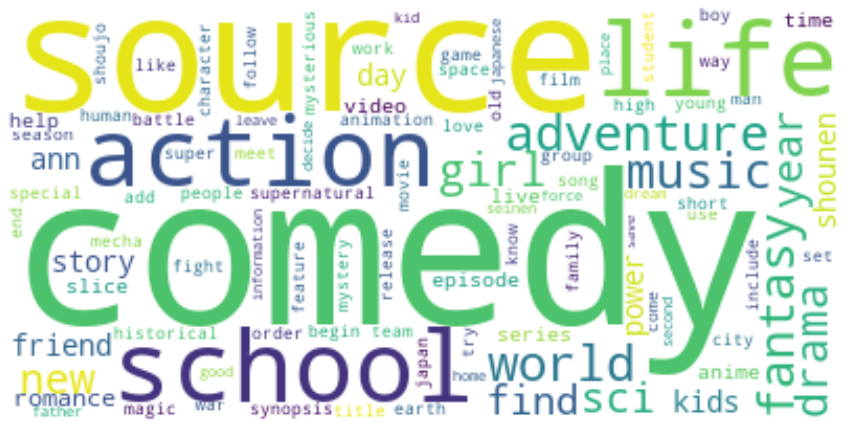

time: 1.06 s (started: 2022-08-06 10:33:35 +00:00)


In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

series = pd.Series(np.concatenate(input_data)).value_counts()[:100]
wordcloud = WordCloud(background_color='white').generate_from_frequencies(series)

plt.figure(figsize=(15,15), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
from gensim import corpora


%time dictionary = corpora.Dictionary(input_data)

#filter out terms which occurs in less than 4 documents and more than 20% of the documents.
#NOTE: Since we have smaller dataset, we will keep this commented for now.

#dictionary.filter_extremes(no_below=4, no_above=0.2)

#list of few which which can be further removed
stoplist = set('hello and if this can would should could tell ask stop come go')
stop_ids = [dictionary.token2id[stopword] for stopword in stoplist if stopword in dictionary.token2id]
dictionary.filter_tokens(stop_ids)

Wall time: 3 ms
time: 0 ns (started: 2022-08-09 23:44:54 +08:00)


In [10]:
#print top 50 items from the dictionary with their unique token-id
dict_tokens = [[[dictionary[key], dictionary.token2id[dictionary[key]]] for key, value in dictionary.items() if key <= 50]]
print (dict_tokens)

[[['adventure', 0], ['ago', 1], ['animevice', 2], ['bear', 3], ['boy', 4], ['chum', 5], ['come', 6], ['comedy', 7], ['elder', 8], ['fantasy', 9], ['film', 10], ['introduce', 11], ['jan', 12], ['long', 13], ['marked', 14], ['movie', 15], ['natsu', 16], ['ojaru', 17], ['ojarumaru', 18], ['play', 19], ['resemblance', 20], ['semira', 21], ['short', 22], ['source', 23], ['spend', 24], ['strange', 25], ['summer', 26], ['unknown', 27], ['village', 28], ['yakusoku', 29], ['curious', 30], ['funny', 31], ['kid', 32], ['listen', 33], ['monkey', 34], ['music', 35], ['nan', 36], ['story', 37], ['teach', 38], ['travel', 39], ['variety', 40], ['wide', 41], ['world', 42], ['akesaka', 43], ['band', 44], ['beat', 45], ['fictional', 46], ['focus', 47], ['franchise', 48], ['heart', 49], ['irodorimidori', 50]]]
time: 0 ns (started: 2022-08-09 23:44:56 +08:00)


In [11]:
corpus = [dictionary.doc2bow(desc) for desc in input_data]

word_frequencies = [[(dictionary[id], frequency) for id, frequency in line] for line in corpus[0:3]]

print(word_frequencies)

[[('adventure', 1), ('ago', 1), ('animevice', 1), ('bear', 1), ('boy', 3), ('chum', 1), ('come', 1), ('comedy', 1), ('elder', 1), ('fantasy', 1), ('film', 1), ('introduce', 1), ('jan', 1), ('long', 1), ('marked', 1), ('movie', 1), ('natsu', 1), ('ojaru', 2), ('ojarumaru', 1), ('play', 1), ('resemblance', 1), ('semira', 2), ('short', 1), ('source', 1), ('spend', 1), ('strange', 1), ('summer', 1), ('unknown', 1), ('village', 1), ('yakusoku', 1)], [('adventure', 1), ('curious', 1), ('funny', 1), ('kid', 1), ('listen', 2), ('monkey', 1), ('music', 2), ('nan', 2), ('story', 1), ('teach', 2), ('travel', 1), ('variety', 1), ('wide', 1), ('world', 1)], [('music', 2), ('nan', 2), ('akesaka', 1), ('band', 1), ('beat', 2), ('fictional', 1), ('focus', 1), ('franchise', 1), ('heart', 2), ('irodorimidori', 1), ('official', 1), ('serina', 1), ('song', 2), ('video', 1)]]
time: 15 ms (started: 2022-08-09 23:44:59 +08:00)


In [12]:
%time st_tfidf_model = gensim.models.TfidfModel(corpus, id2word=dictionary)
%time st_lsi_model = gensim.models.LsiModel(st_tfidf_model[corpus], id2word=dictionary, num_topics=300)

Wall time: 2.01 ms
Wall time: 468 ms
time: 468 ms (started: 2022-08-09 23:45:06 +08:00)


In [13]:
%time gensim.corpora.MmCorpus.serialize('st_tfidf_model_mm', st_tfidf_model[corpus])
%time gensim.corpora.MmCorpus.serialize('st_lsi_model_mm',st_lsi_model[st_tfidf_model[corpus]])

# %time gensim.corpora.MmCorpus.serialize('test_set_tfidf_model_mm', st_tfidf_model[corpus])
# %time gensim.corpora.MmCorpus.serialize('test_set_lsi_model_mm',st_lsi_model[st_tfidf_model[corpus]])


Wall time: 7.92 ms
Wall time: 12 ms
time: 16 ms (started: 2022-08-09 23:45:44 +08:00)


In [17]:
#Load the indexed corpus
st_tfidf_corpus = gensim.corpora.MmCorpus('st_tfidf_model_mm')
st_lsi_corpus = gensim.corpora.MmCorpus('st_lsi_model_mm')

print(st_tfidf_corpus)
print(st_lsi_corpus)

MmCorpus(16214 documents, 45848 features, 572233 non-zero entries)
MmCorpus(16214 documents, 300 features, 4864200 non-zero entries)
time: 16 ms (started: 2022-08-09 20:44:05 +08:00)


In [18]:
from gensim.similarities import MatrixSimilarity

%time st_index = MatrixSimilarity(st_lsi_corpus, num_features = st_lsi_corpus.num_terms)

Wall time: 6.33 s
time: 6.33 s (started: 2022-08-09 20:44:07 +08:00)


In [22]:
from operator import itemgetter

def search_anime(search_term, num_best=5):

    query_bow = dictionary.doc2bow(spacy_tokenizer(search_term))
    query_tfidf = st_tfidf_model[query_bow]
    query_lsi = st_lsi_model[query_tfidf]

    st_index.num_best = num_best

    st_list = st_index[query_lsi]

    st_list.sort(key=itemgetter(1), reverse=True)
    st_names = []

    for j, dentry in enumerate(st_list):

        st_names.append (
            {
                'Relevance': round((dentry[1] * 100),2),
                'Name': data['Name'][dentry[0]],
                'Genres' : data['Genres'][dentry[0]],
                'Synopsis' : data['sypnopsis'][dentry[0]]
            }

        )
        if j == (st_index.num_best-1):
            break

    return pd.DataFrame(st_names, columns=['Relevance','Name','Genres','Synopsis'])
    #return pd.DataFrame(st_names, columns=['Relevance'])

time: 0 ns (started: 2022-08-09 20:45:14 +08:00)


In [25]:
#Query: comedy
df = search_anime('Comedy')
df

,Relevance,Name,Genres,Synopsis
0,64.67,Cakes,Comedy,Sweets having idle chatter.
1,37.25,Tsubuyaki-tai,Comedy,surreal dialogue-heavy comedy where objects ta...
2,37.02,Danchi Tomoo,"Comedy, Seinen",It's a heartwarming and sometimes nonsense com...
3,36.59,Africa no Salaryman (TV),"Slice of Life, Comedy",frica no Salaryman is a slapstick workplace co...
4,35.63,Zenryoku Yobikou 5.5 Seminar,"Comedy, Parody, School",CalorieMate x FROGMAN collaboration in a schoo...


time: 16 ms (started: 2022-08-09 20:45:31 +08:00)


In [21]:
#Query: cowboy
df = search_anime('cowboy')
df

,Relevance,Name,Genres,Synopsis
0,55.65,Chibikko Cowboy,"Music, Kids",little boy has fun being a cowboy out in the W...
1,48.79,Waga Na wa Cowboy,"Music, Kids",child plays cowboy with their wooden horse.
2,39.24,Cowboy Bebop: Yose Atsume Blues,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Due to the violence portrayed in the Cowboy Be...
3,39.20,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
4,33.82,Mama Gomennasai,"Music, Kids",little boy apologizes to his mom about all the...


time: 16 ms (started: 2022-08-09 20:44:24 +08:00)


In [41]:
df = search_anime('chibikko')
df

,Relevance,Name,Genres,Synopsis
0,65.08,Chibikko Kaijuu Yadamon,"Comedy, Kids, Supernatural",comedy about a spoiled and bratty kid monster....
1,63.15,Chibikko Kamu no Bouken,"Adventure, Kids",Based on the childrens' book by Kanzawa Toshiko.
2,55.14,Kaijuu Step Wandabada,"Comedy, Kids","me based on the picture book Kaijuu Step , whi..."
3,52.61,Chibikko Cowboy,"Music, Kids",little boy has fun being a cowboy out in the W...
4,44.43,Ken to Kaijuu,"Kids, Magic, Fantasy",hat if the boogie monster was a kaijuu? What i...


time: 51.8 ms (started: 2022-08-06 11:13:49 +00:00)


In [45]:
df = search_anime('naruto')
df

,Relevance,Name,Genres,Synopsis
0,91.66,"Naruto: Shippuuden - Shippuu! ""Konoha Gakuen"" Den",Comedy,Naruto school special. Naruto is a new cool st...
1,88.90,Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houj...,"Action, Comedy, Sports, Martial Arts, Fantasy,...",The genin of Konoha are having a sports day fi...
2,88.32,Naruto,"Action, Adventure, Comedy, Super Power, Martia...","oments prior to Naruto Uzumaki's birth, a huge..."
3,87.41,Boruto: Naruto Next Generations,"Action, Adventure, Super Power, Martial Arts, ...",Following the successful end of the Fourth Shi...
4,87.26,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Action, Adventure, Martial Arts, Shounen, Supe...",Naruto faces off against his old pupil Konoham...


time: 27.4 ms (started: 2022-08-06 11:15:10 +00:00)


In [ ]:
df1 = df.iloc[:,0]
df1 = df1.to_numpy().tolist()

ls = []
for i in range(5):
  ls.append(df1[i])

ls1 = [ls]


In [ ]:
pred1 = np.asarray([[5,4,3,2,1]])

In [ ]:
from sklearn.metrics import ndcg_score

In [ ]:
ndcg_score(pred1,ls1)

1.0